
# EDA: persons_of_concern.csv

Dieses Notebook gibt einen Überblick über den Datensatz persons_of_concern.csv.
Der Fokus liegt auf Struktur, zeitlicher Entwicklung und den wichtigsten Personengruppen.


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV laden
df = pd.read_csv("../archive/persons_of_concern.csv")

# Erste Übersicht
df.head()


C:\Users\paulk\AppData\Local\Temp\ipykernel_39820\3500252406.py:6: DtypeWarning: Columns (3,4,5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../archive/persons_of_concern.csv")


,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Returned refugees,Internally displaced persons (IDPs),Returned IDPs,Stateless persons,Others of concern,Total Population
0,1951,Australia,Various/Unknown,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,180000
1,1951,Austria,Various/Unknown,282000.0,NaN,NaN,NaN,NaN,NaN,NaN,282000
2,1951,Belgium,Various/Unknown,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,55000
3,1951,Canada,Various/Unknown,168511.0,NaN,NaN,NaN,NaN,NaN,NaN,168511
4,1951,Switzerland,Various/Unknown,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,10000



## Grundlegende Informationen
Wir schauen uns zuerst die Spaltennamen, Datentypen und die Anzahl fehlender Werte an.


In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117321 entries, 0 to 117320
Data columns (total 11 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Year                                      117321 non-null  int64  
 1   Country / territory of asylum/residence   117321 non-null  object 
 2   Origin                                    117321 non-null  object 
 3   Refugees (incl. refugee-like situations)  101496 non-null  object 
 4   Asylum-seekers (pending cases)            74629 non-null   object 
 5   Returned refugees                         26600 non-null   object 
 6   Internally displaced persons (IDPs)       20823 non-null   float64
 7   Returned IDPs                             20621 non-null   float64
 8   Stateless persons                         21004 non-null   object 
 9   Others of concern                         21084 non-null   object 
 10  Total Population    

In [4]:

df.isna().sum()


Year                                            0
Country / territory of asylum/residence         0
Origin                                          0
Refugees (incl. refugee-like situations)    15825
Asylum-seekers (pending cases)              42692
Returned refugees                           90721
Internally displaced persons (IDPs)         96498
Returned IDPs                               96700
Stateless persons                           96317
Others of concern                           96237
Total Population                                0
dtype: int64


## Zeitlicher Bereich
Welche Jahre sind im Datensatz enthalten?


In [5]:

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'].min(), df['Year'].max()


(np.int64(1951), np.int64(2016))


## Entwicklung der Gesamtzahl über die Jahre
Wir betrachten die jährliche Summe der Total Population über alle Länder.


In [6]:
cols_numeric = [
    'Refugees (incl. refugee-like situations)',
    'Asylum-seekers (pending cases)',
    'Returned refugees',
    'Internally displaced persons (IDPs)',
    'Returned IDPs',
    'Stateless persons',
    'Others of concern',
    'Total Population'
]

for col in cols_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

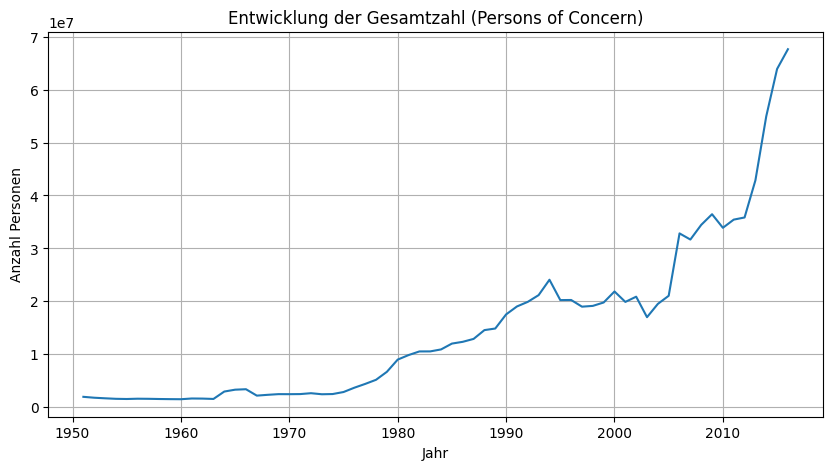

In [7]:

yearly_total = df.groupby('Year')['Total Population'].sum(min_count=1)

plt.figure(figsize=(10,5))
plt.plot(yearly_total.index, yearly_total.values)
plt.xlabel("Jahr")
plt.ylabel("Anzahl Personen")
plt.title("Entwicklung der Gesamtzahl (Persons of Concern)")
plt.grid(True)
plt.show()



## Verteilung der Personengruppen
Wir vergleichen die wichtigsten Kategorien (z. B. Refugees, IDPs, Stateless).


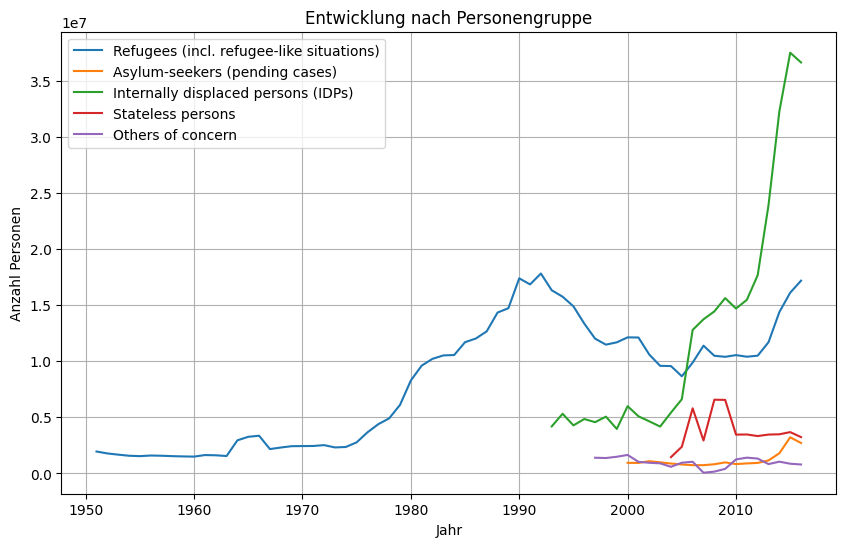

In [8]:

cols = [
    'Refugees (incl. refugee-like situations)',
    'Asylum-seekers (pending cases)',
    'Internally displaced persons (IDPs)',
    'Stateless persons',
    'Others of concern'
]

grouped = df.groupby('Year')[cols].sum(min_count=1)

grouped.plot(figsize=(10,6))
plt.xlabel("Jahr")
plt.ylabel("Anzahl Personen")
plt.title("Entwicklung nach Personengruppe")
plt.grid(True)
plt.show()



## Wichtigste Aufnahmeländer (aggregiert)
Welche Länder haben insgesamt die höchsten Werte?


In [9]:

top_countries = (
    df.groupby('Country / territory of asylum/residence')['Total Population']
    .sum(min_count=1)
    .sort_values(ascending=False)
    .head(10)
)

top_countries


Country / territory of asylum/residence
Pakistan                    90347706.0
Iran (Islamic Rep. of)      71625678.0
Colombia                    57037336.0
Dem. Rep. of the Congo      53453201.0
Sudan                       43421174.0
Syrian Arab Rep.            40496629.0
United States of America    35351568.0
Iraq                        33736056.0
Germany                     33055463.0
Somalia                     26005866.0
Name: Total Population, dtype: float64


## Fazit
- Der Datensatz deckt einen langen Zeitraum ab (ab 1951).
- Viele frühe Jahre enthalten unvollständige Detailangaben, aber die Gesamtzahlen sind meist vorhanden.
- Die Entwicklung zeigt einen klaren langfristigen Anstieg der betroffenen Personengruppen.
- Besonders Refugees und IDPs treiben die Gesamtzahlen.
